# Diabetes Prediction using Machine Learning

Diabetes, is a group of metabolic disorders in which there are high blood sugar levels over a prolonged period. Symptoms of high blood sugar include frequent urination, increased thirst, and increased hunger. If left untreated, diabetes can cause many complications. Acute complications can include diabetic ketoacidosis, hyperosmolar hyperglycemic state, or death. Serious long-term complications include cardiovascular disease, stroke, chronic kidney disease, foot ulcers, and damage to the eyes.

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

## Objective
We will try to build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?

## **Details about the dataset:**

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

- **Pregnancies**: Number of times pregnant
- **Glucose**: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- **BloodPressure**: Diastolic blood pressure (mm Hg)
- **SkinThickness**: Triceps skin fold thickness (mm)
- **Insulin**: 2-Hour serum insulin (mu U/ml)
- **BMI**: Body mass index (weight in kg/(height in m)^2)
- **DiabetesPedigreeFunction**: Diabetes pedigree function
- **Age**: Age (years)
- **Outcome**: Class variable (0 or 1)

**Number of Observation Units: 768**

**Variable Number: 9**

**Result; The model created as a result of XGBoost hyperparameter optimization became the model with the lowest Cross Validation Score value. (0.90)**

# 1) Exploratory Data Analysis

In [1]:
pip install statsmodels seaborn lightgbm

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\hp\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
#Installation of required libraries
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold
import warnings
warnings.simplefilter(action = "ignore") 

In [3]:
#Reading the dataset
df = pd.read_csv(r"E:\Ty sem 1\aiml corse sem 5 projects\Diabetes-Prediction-using-Machine-Learning-main\Diabetes-Prediction-using-Machine-Learning-main\Data\diabetes.csv")

In [4]:
# The first 5 observation units of the data set were accessed.
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# The size of the data set was examined. It consists of 768 observation units and 9 variables.
df.shape

(768, 9)

In [6]:
#Feature information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# Descriptive statistics of the data set accessed.
df.describe([0.10,0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,10%,25%,50%,75%,90%,95%,99%,max
Pregnancies,768.0,3.845052,3.369578,0.000,0.000,1.00000,3.0000,6.00000,9.0000,10.00000,13.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,85.000,99.00000,117.0000,140.25000,167.0000,181.00000,196.00000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,54.000,62.00000,72.0000,80.00000,88.0000,90.00000,106.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.000,0.00000,23.0000,32.00000,40.0000,44.00000,51.33000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.000,0.00000,30.5000,127.25000,210.0000,293.00000,519.90000,846.00
BMI,768.0,31.992578,7.884160,0.000,23.600,27.30000,32.0000,36.60000,41.5000,44.39500,50.75900,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.165,0.24375,0.3725,0.62625,0.8786,1.13285,1.69833,2.42
Age,768.0,33.240885,11.760232,21.000,22.000,24.00000,29.0000,41.00000,51.0000,58.00000,67.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.000,0.00000,0.0000,1.00000,1.0000,1.00000,1.00000,1.00


In [8]:
# The distribution of the Outcome variable was examined.
df["Outcome"].value_counts()*100/len(df)

Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64

In [9]:
# The classes of the outcome variable were examined.
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

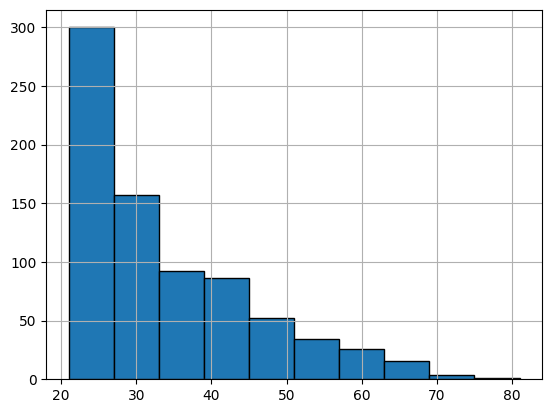

In [10]:
# The histagram of the Age variable was reached.
df["Age"].hist(edgecolor = "black");

In [11]:
print("Max Age: " + str(df["Age"].max()) + " Min Age: " + str(df["Age"].min()))

Max Age: 81 Min Age: 21


<Axes: xlabel='BMI', ylabel='Density'>

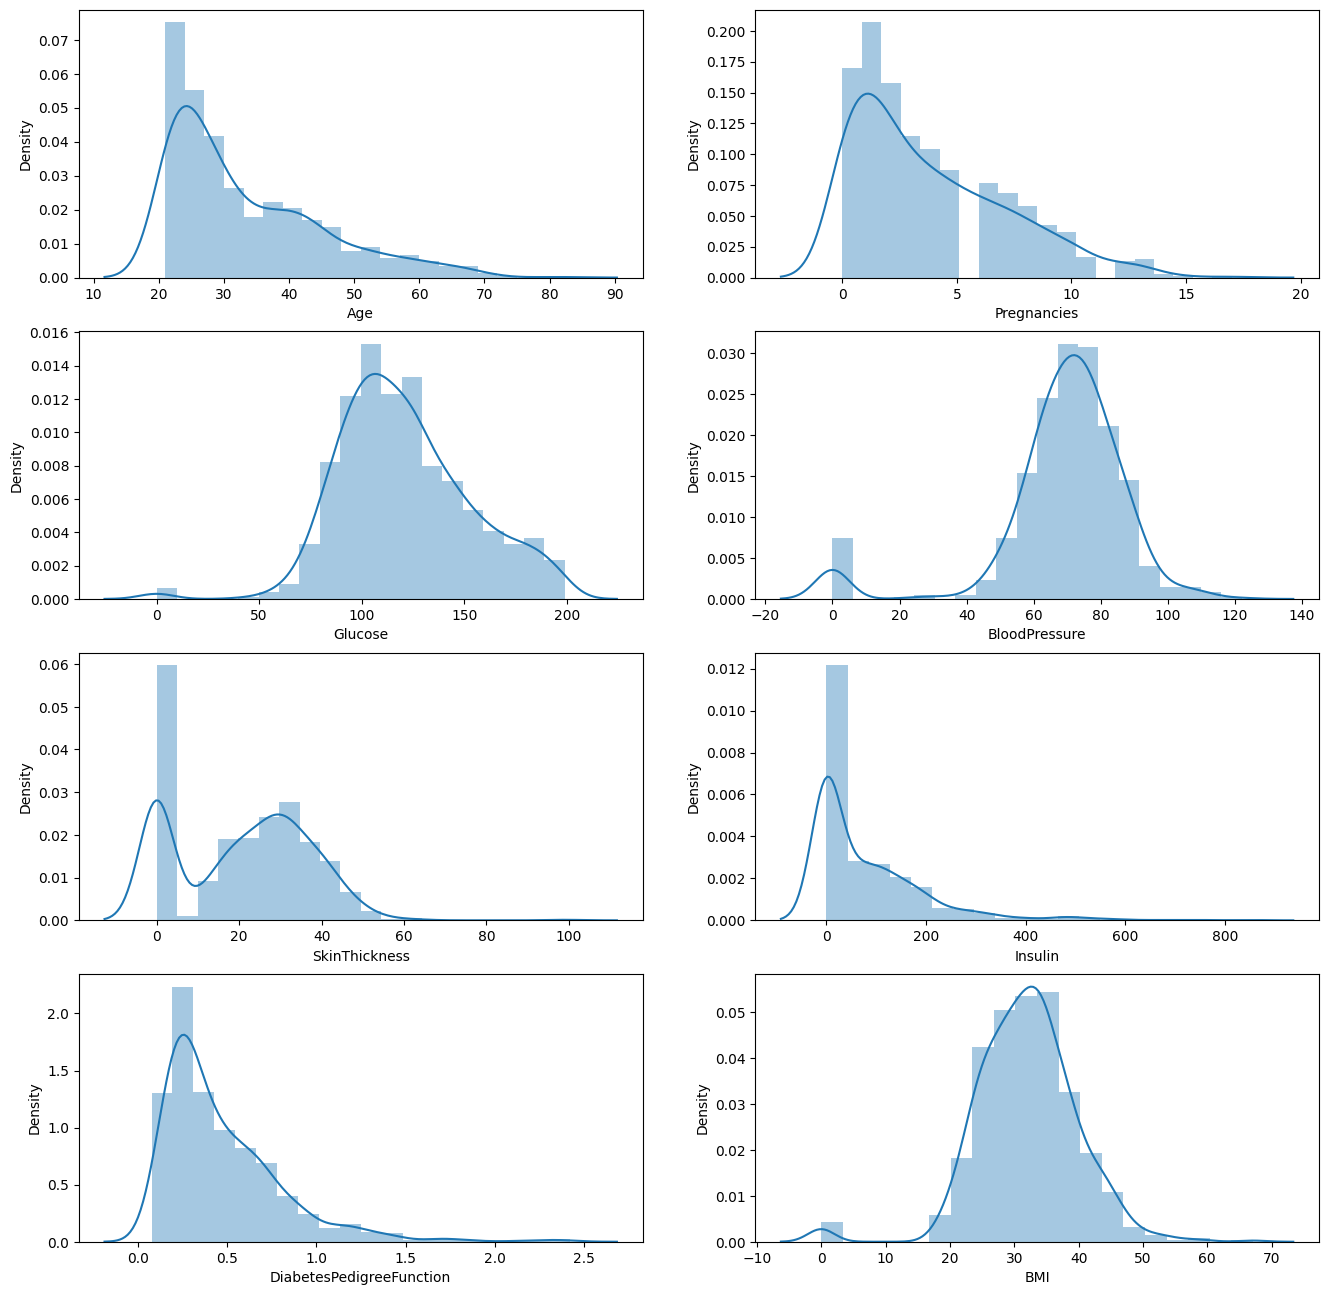

In [ ]:
# Histogram and density graphs of all variables were accessed.
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(df.Age, bins = 20, ax=ax[0,0]) 
sns.distplot(df.Pregnancies, bins = 20, ax=ax[0,1]) 
sns.distplot(df.Glucose, bins = 20, ax=ax[1,0]) 
sns.distplot(df.BloodPressure, bins = 20, ax=ax[1,1]) 
sns.distplot(df.SkinThickness, bins = 20, ax=ax[2,0])
sns.distplot(df.Insulin, bins = 20, ax=ax[2,1])
sns.distplot(df.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0]) 
sns.distplot(df.BMI, bins = 20, ax=ax[3,1]) 

In [ ]:
df.groupby("Outcome").agg({"Pregnancies":"mean"})
#0=no diabetic

,Pregnancies
Outcome,
0,3.298000
1,4.865672


In [14]:
df.groupby("Outcome").agg({"Age":"mean"})

,Age
Outcome,
0,31.190000
1,37.067164


In [15]:
df.groupby("Outcome").agg({"Age":"max"})

,Age
Outcome,
0,81
1,70


In [16]:
df.groupby("Outcome").agg({"Insulin": "mean"})

,Insulin
Outcome,
0,68.792000
1,100.335821


In [17]:
df.groupby("Outcome").agg({"Insulin": "max"})

,Insulin
Outcome,
0,744
1,846


In [18]:
df.groupby("Outcome").agg({"Glucose": "mean"})

,Glucose
Outcome,
0,109.980000
1,141.257463


In [19]:
df.groupby("Outcome").agg({"Glucose": "max"})

,Glucose
Outcome,
0,197
1,199


In [20]:
df.groupby("Outcome").agg({"BMI": "mean"})

,BMI
Outcome,
0,30.304200
1,35.142537


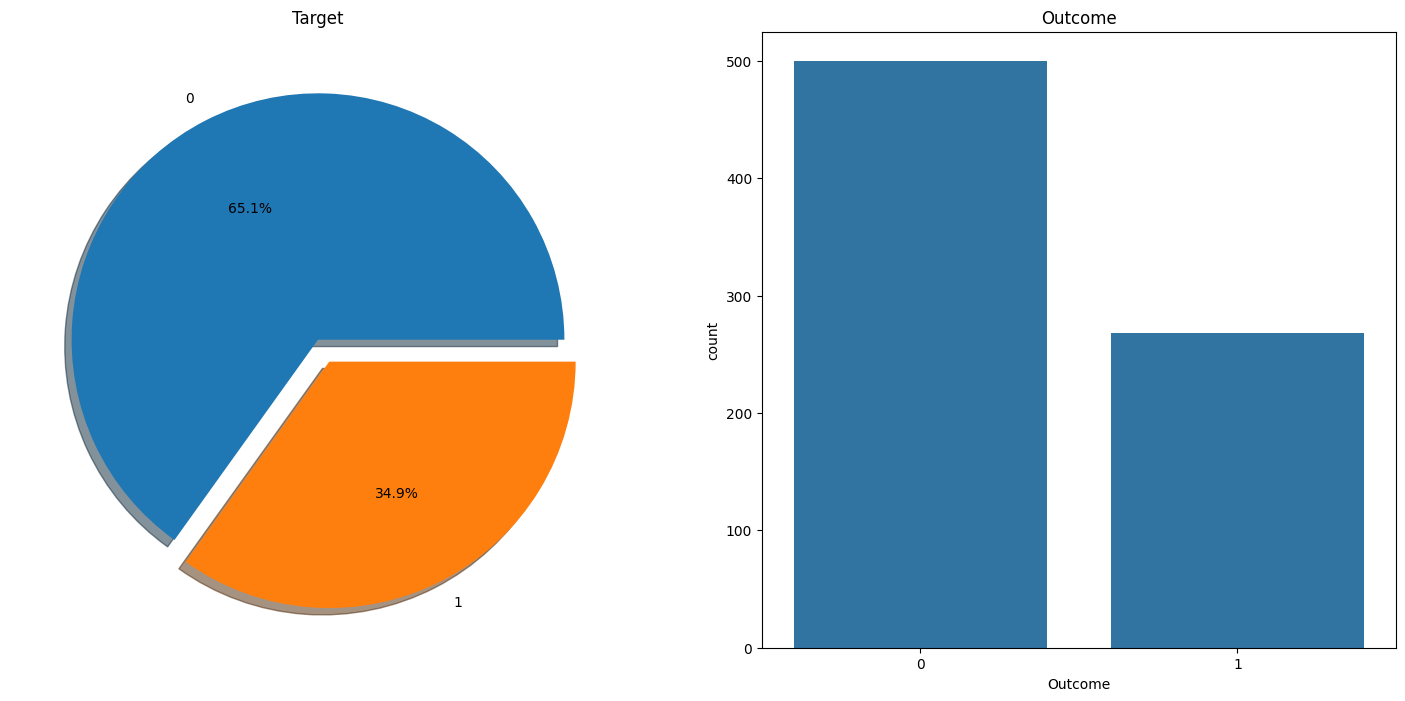

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# The distribution of the outcome variable in the data was examined and visualized.
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df['Outcome'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Target')
ax[0].set_ylabel('')

sns.countplot(x='Outcome', data=df, ax=ax[1])
ax[1].set_title('Outcome')

plt.show()

In [22]:
# Access to the correlation of the data set was provided. What kind of relationship is examined between the variables. 
# If the correlation value is> 0, there is a positive correlation. While the value of one variable increases, the value of the other variable also increases.
# Correlation = 0 means no correlation.
# If the correlation is <0, there is a negative correlation. While one variable increases, the other variable decreases. 
# When the correlations are examined, there are 2 variables that act as a positive correlation to the Salary dependent variable.
# These variables are Glucose. As these increase, Outcome variable increases.
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


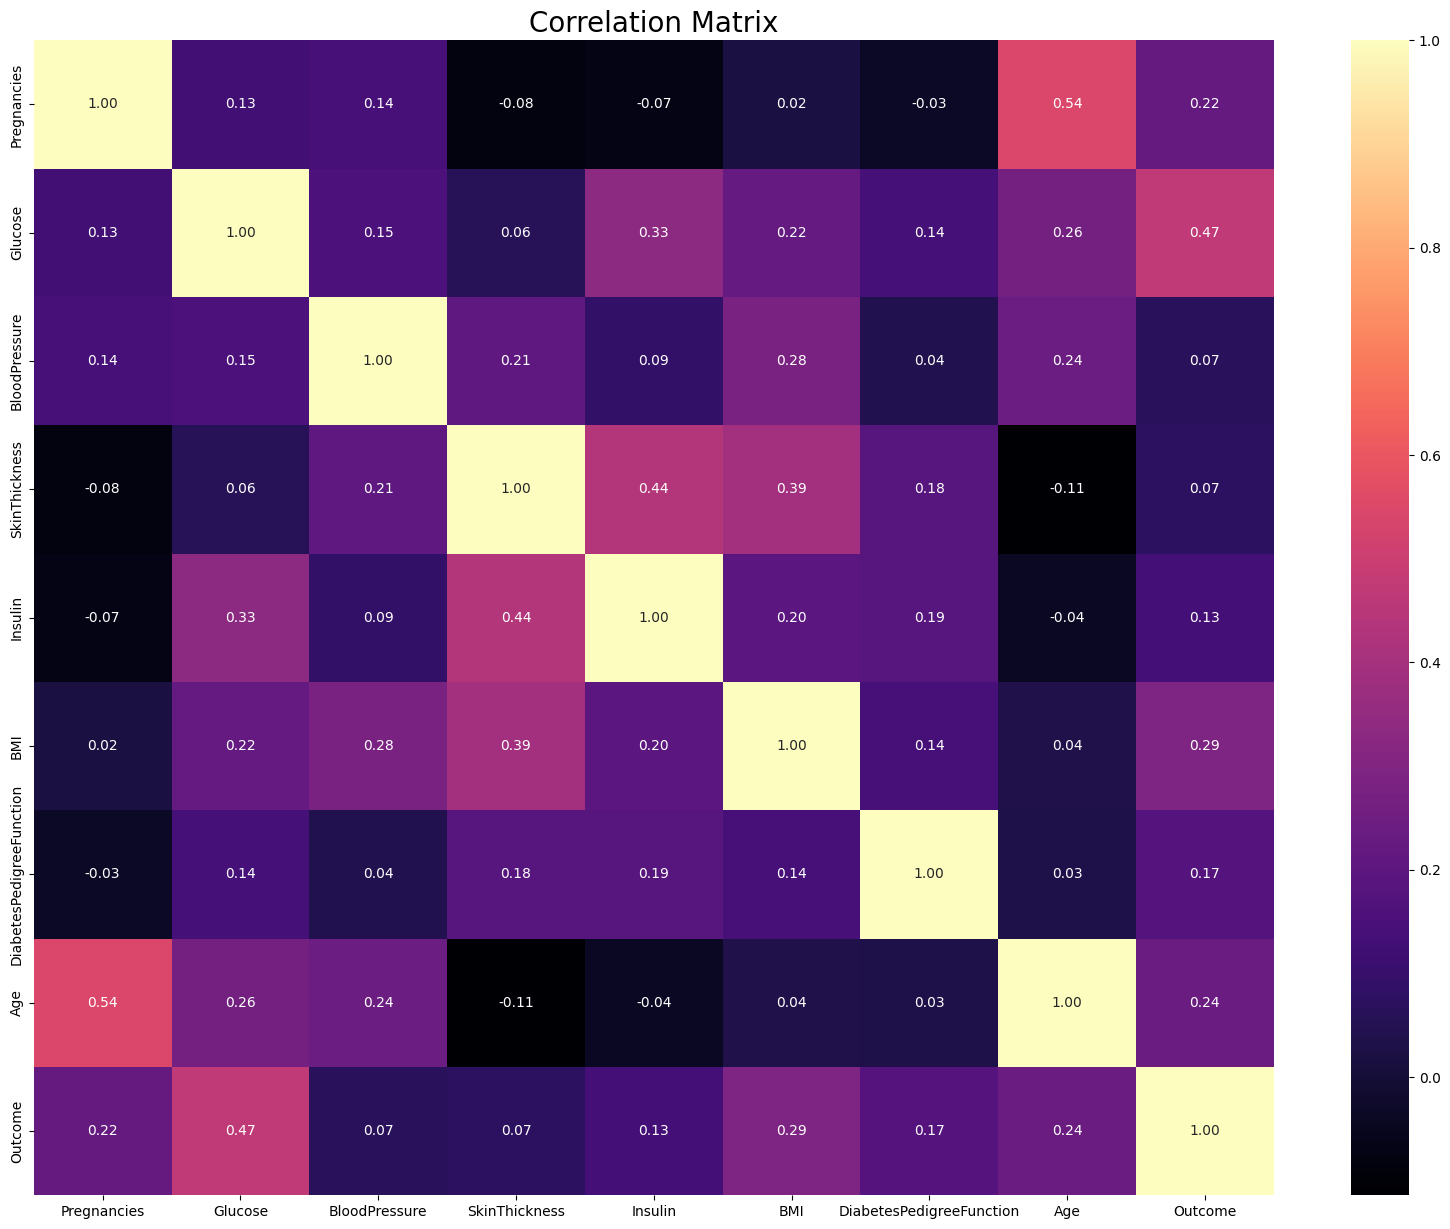

In [23]:
# Correlation matrix graph of the data set
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

# 2) Data Preprocessing

## 2.1) Missing Observation Analysis

We saw on df.head() that some features contain 0, it doesn't make sense here and this indicates missing value Below we replace 0 value by NaN:

In [24]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [25]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [26]:
# Now, we can look at where are missing values
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [27]:
pip install missingno

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\hp\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


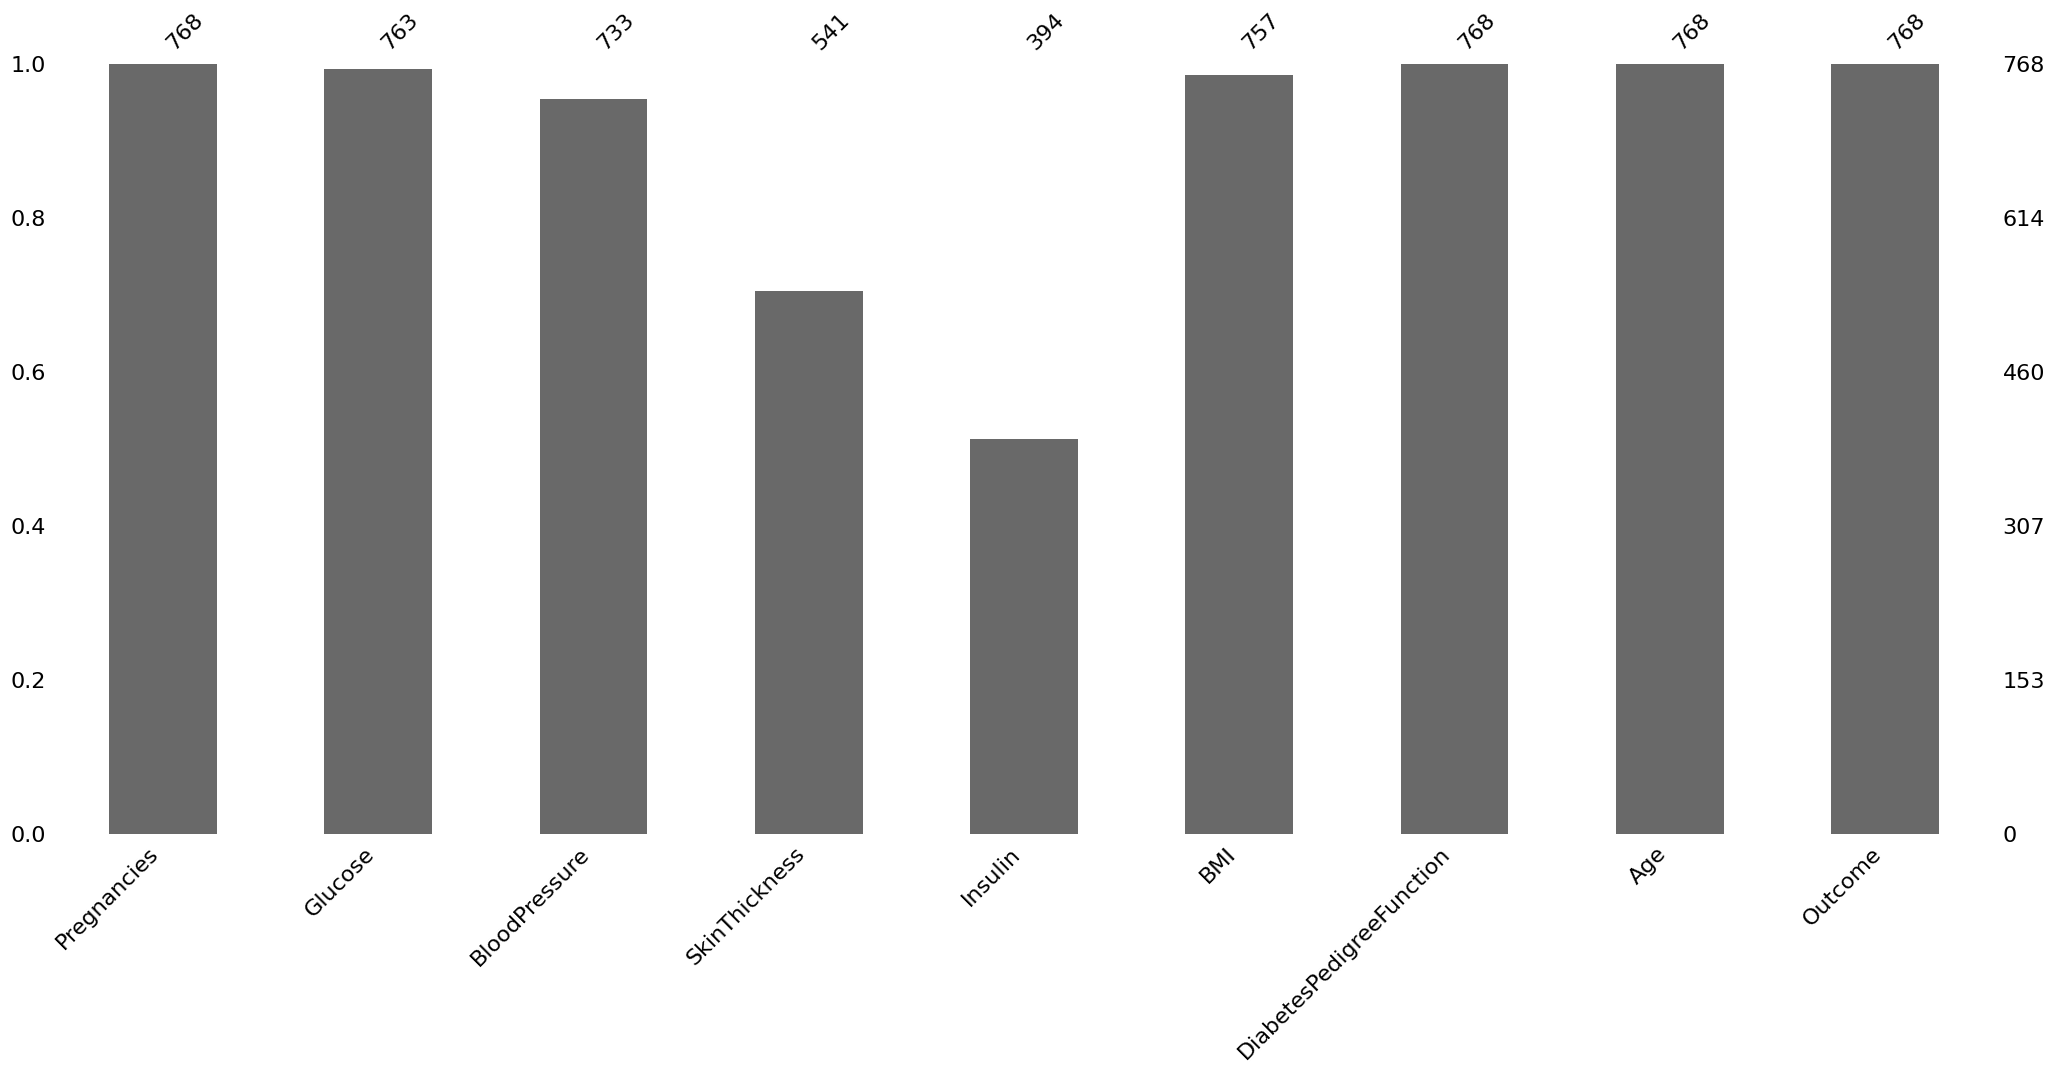

In [28]:
# Have been visualized using the missingno library for the visualization of missing observations.
# Plotting 
import missingno as msno
msno.bar(df);

In [29]:
# The missing values ​​will be filled with the median values ​​of each variable.
def median_target(var):   
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [30]:
# The values to be given for incomplete observations are given the median value of people who are not sick and the median values of people who are sick.
columns = df.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    df.loc[(df['Outcome'] == 0 ) & (df[i].isnull()), i] = median_target(i)[i][0]
    df.loc[(df['Outcome'] == 1 ) & (df[i].isnull()), i] = median_target(i)[i][1]

In [31]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [32]:
# Missing values were filled.
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## 2.2) Outlier Observation Analysis

In [33]:
# In the data set, there were asked whether there were any outlier observations compared to the 25% and 75% quarters.
# It was found to be an outlier observation.
for feature in df:
    
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    if df[(df[feature] > upper)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")

Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


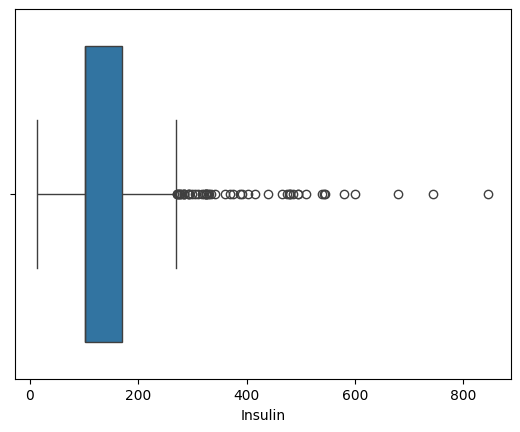

In [34]:
# The process of visualizing the Insulin variable with boxplot method was done. We find the outlier observations on the chart.
import seaborn as sns
sns.boxplot(x = df["Insulin"]);

In [35]:
#We conduct a stand alone observation review for the Insulin variable
#We suppress contradictory values
Q1 = df.Insulin.quantile(0.25)
Q3 = df.Insulin.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df.loc[df["Insulin"] > upper,"Insulin"] = upper

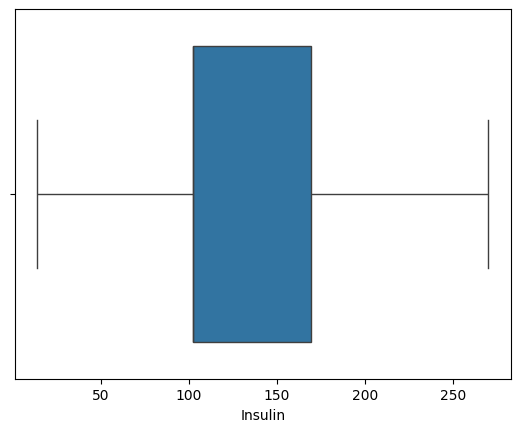

In [36]:
import seaborn as sns
sns.boxplot(x = df["Insulin"]);

## 2.3)  Local Outlier Factor (LOF)

In [37]:
# We determine outliers between all variables with the LOF method
from sklearn.neighbors import LocalOutlierFactor
lof =LocalOutlierFactor(n_neighbors= 10)
lof.fit_predict(df)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1

In [38]:
df_scores = lof.negative_outlier_factor_
np.sort(df_scores)[0:30]

array([-3.05893469, -2.37289269, -2.15297995, -2.09708735, -2.0772561 ,
       -1.95255968, -1.86384019, -1.74003158, -1.72703492, -1.71674689,
       -1.70343883, -1.6688722 , -1.64296768, -1.64190437, -1.61620872,
       -1.61369917, -1.60057603, -1.5988774 , -1.59608032, -1.57027568,
       -1.55876022, -1.55674614, -1.51852389, -1.50843907, -1.50280943,
       -1.50160698, -1.48391514, -1.4752983 , -1.4713427 , -1.47006248])

In [39]:
#We choose the threshold value according to lof scores
threshold = np.sort(df_scores)[7]
threshold

-1.740031580305444

In [40]:
#We delete those that are higher than the threshold
outlier = df_scores > threshold
df = df[outlier]

In [41]:
# The size of the data set was examined.
df.shape

(760, 9)

# 3) Feature Engineering

Creating new variables is important for models. But you need to create a logical new variable. For this data set, some new variables were created according to BMI, Insulin and glucose variables.

In [42]:
# According to BMI, some ranges were determined and categorical variables were assigned.
NewBMI = pd.Series(["Underweight", "Normal", "Overweight", "Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")
df["NewBMI"] = NewBMI
df.loc[df["BMI"] < 18.5, "NewBMI"] = NewBMI[0]
df.loc[(df["BMI"] > 18.5) & (df["BMI"] <= 24.9), "NewBMI"] = NewBMI[1]
df.loc[(df["BMI"] > 24.9) & (df["BMI"] <= 29.9), "NewBMI"] = NewBMI[2]
df.loc[(df["BMI"] > 29.9) & (df["BMI"] <= 34.9), "NewBMI"] = NewBMI[3]
df.loc[(df["BMI"] > 34.9) & (df["BMI"] <= 39.9), "NewBMI"] = NewBMI[4]
df.loc[df["BMI"] > 39.9 ,"NewBMI"] = NewBMI[5]

In [43]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3


In [44]:
# A categorical variable creation process is performed according to the insulin value.
def set_insulin(row):
    if row["Insulin"] >= 16 and row["Insulin"] <= 166:
        return "Normal"
    else:
        return "Abnormal"

In [45]:
# The operation performed was added to the dataframe.
df = df.assign(NewInsulinScore=df.apply(set_insulin, axis=1))

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1,Abnormal
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight,Normal
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal,Abnormal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3,Abnormal


In [46]:
# Some intervals were determined according to the glucose variable and these were assigned categorical variables.
NewGlucose = pd.Series(["Low", "Normal", "Overweight", "Secret", "High"], dtype = "category")
df["NewGlucose"] = NewGlucose
df.loc[df["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]
df.loc[(df["Glucose"] > 70) & (df["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]
df.loc[(df["Glucose"] > 99) & (df["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]
df.loc[df["Glucose"] > 126 ,"NewGlucose"] = NewGlucose[3]

In [47]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore,NewGlucose
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1,Abnormal,Secret
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight,Normal,Normal
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal,Abnormal,Secret
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal,Normal
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3,Abnormal,Secret


# 4) One Hot Encoding

Categorical variables in the data set should be converted into numerical values. For this reason, these transformation processes are performed with Label Encoding and One Hot Encoding method.

In [48]:
# Here, by making One Hot Encoding transformation, categorical variables were converted into numerical values. It is also protected from the Dummy variable trap.
df = pd.get_dummies(df, columns =["NewBMI","NewInsulinScore", "NewGlucose"], drop_first = True)

In [49]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,True,False,False,False,False,False,False,False,False,True
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,False,False,False,True,False,True,False,True,False,False
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,False,False,False,False,False,False,False,False,False,True
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,False,False,False,True,False,True,False,True,False,False
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,False,False,True,False,False,False,False,False,False,True


In [50]:
categorical_df = df[['NewBMI_Obesity 1','NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight','NewBMI_Underweight',
                     'NewInsulinScore_Normal','NewGlucose_Low','NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret']]

In [51]:
categorical_df.head()

,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,True,False,False,False,False,False,False,False,False,True
1,False,False,False,True,False,True,False,True,False,False
2,False,False,False,False,False,False,False,False,False,True
3,False,False,False,True,False,True,False,True,False,False
4,False,False,True,False,False,False,False,False,False,True


In [52]:
y = df["Outcome"]
X = df.drop(["Outcome",'NewBMI_Obesity 1','NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight','NewBMI_Underweight',
                     'NewInsulinScore_Normal','NewGlucose_Low','NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret'], axis = 1)
cols = X.columns
index = X.index

In [53]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [54]:
# The variables in the data set are an effective factor in increasing the performance of the models by standardization.  
# There are multiple standardization methods. These are methods such as" Normalize"," MinMax"," Robust" and "Scale".
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)
X = transformer.transform(X)
X = pd.DataFrame(X, columns = cols, index = index)

In [55]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.6,0.775,0.000,1.000000,1.000000,0.177778,0.669707,1.235294
1,-0.4,-0.800,-0.375,0.142857,0.000000,-0.600000,-0.049511,0.117647
2,1.0,1.650,-0.500,0.571429,1.000000,-0.966667,0.786971,0.176471
3,-0.4,-0.700,-0.375,-0.714286,-0.126866,-0.433333,-0.528990,-0.470588
4,-0.6,0.500,-2.000,1.000000,0.977612,1.233333,4.998046,0.235294


In [56]:
X = pd.concat([X,categorical_df], axis = 1)

In [57]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,0.6,0.775,0.000,1.000000,1.000000,0.177778,0.669707,1.235294,True,False,False,False,False,False,False,False,False,True
1,-0.4,-0.800,-0.375,0.142857,0.000000,-0.600000,-0.049511,0.117647,False,False,False,True,False,True,False,True,False,False
2,1.0,1.650,-0.500,0.571429,1.000000,-0.966667,0.786971,0.176471,False,False,False,False,False,False,False,False,False,True
3,-0.4,-0.700,-0.375,-0.714286,-0.126866,-0.433333,-0.528990,-0.470588,False,False,False,True,False,True,False,True,False,False
4,-0.6,0.500,-2.000,1.000000,0.977612,1.233333,4.998046,0.235294,False,False,True,False,False,False,False,False,False,True


In [58]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

Logistic Regression (From Scratch)

In [85]:
class LogisticRegressionScratch:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        self.m, self.n = X.shape
        self.weights = np.zeros(self.n)
        self.bias = 0

        # Gradient descent
        for _ in range(self.epochs):
            model = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(model)

            # Compute gradients
            dw = (1 / self.m) * np.dot(X.T, (predictions - y))
            db = (1 / self.m) * np.sum(predictions - y)

            # Update weights
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        model = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(model)
        return [1 if i > 0.5 else 0 for i in predictions]


First 10 Predictions: [1, 0, 0, 0, 0, 0, 0, 1, 0, 1]
Actual values: [0 0 0 0 0 0 0 0 0 0]
Overall Accuracy: 69.48%

Confusion Matrix:
[[84 15]
 [32 23]]

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.85      0.78        99
           1       0.61      0.42      0.49        55

    accuracy                           0.69       154
   macro avg       0.66      0.63      0.64       154
weighted avg       0.68      0.69      0.68       154


Feature-wise prediction power:
Pregnancies: 68.83%
Glucose: 64.29%
BloodPressure: 64.29%
SkinThickness: 64.29%
Insulin: 53.90%
BMI: 37.01%
DiabetesPedigreeFunction: 64.29%
Age: 35.71%

Features sorted by prediction power:
Pregnancies: 68.83%
Glucose: 64.29%
BloodPressure: 64.29%
SkinThickness: 64.29%
DiabetesPedigreeFunction: 64.29%
Insulin: 53.90%
BMI: 37.01%
Age: 35.71%


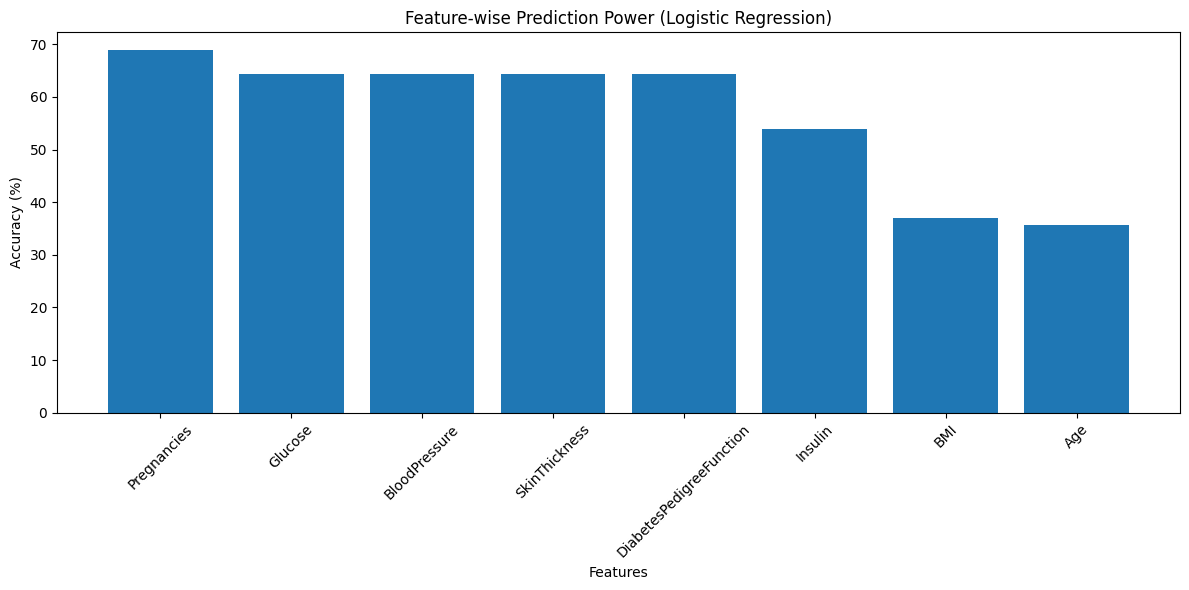


Feature importance relative to random prediction (50%):
Pregnancies: +37.66% better than random
Glucose: +28.57% better than random
BloodPressure: +28.57% better than random
SkinThickness: +28.57% better than random
DiabetesPedigreeFunction: +28.57% better than random
Insulin: +7.79% better than random
BMI: -25.97% better than random
Age: -28.57% better than random

Learning rate analysis:
Learning rate 0.001: 68.83%
Learning rate 0.01: 69.48%
Learning rate 0.1: 41.56%
Learning rate 0.5: 67.53%


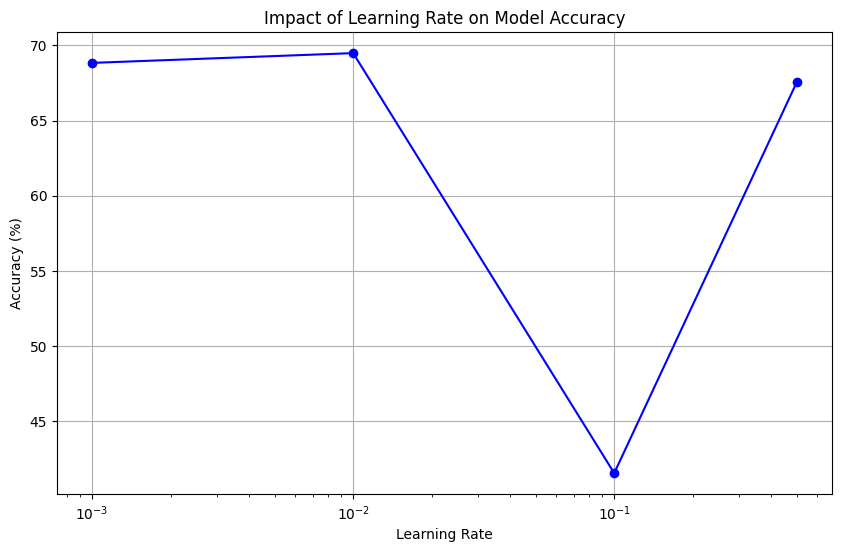


Training convergence analysis:
Epochs 100: 38.31%
Epochs 500: 38.31%
Epochs 1000: 69.48%
Epochs 2000: 38.31%


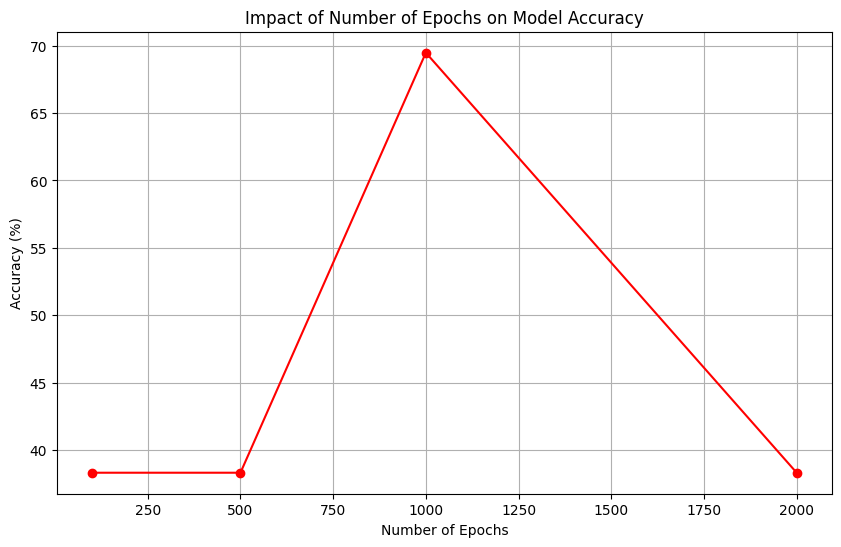


Top feature combinations analysis:
Features ['Pregnancies', 'Glucose']: 64.29%
Features ['Pregnancies', 'BloodPressure']: 65.58%
Features ['Glucose', 'BloodPressure']: 40.91%
Features ['Pregnancies', 'Glucose', 'BloodPressure']: 72.73%


In [107]:


# Load the data
data = pd.read_csv(r"E:\Ty sem 1\aiml corse sem 5 projects\Diabetes-Prediction-using-Machine-Learning-main\Diabetes-Prediction-using-Machine-Learning-main\Data\diabetes.csv")

# Features and target split
X = data.iloc[:, :-1].values  # Features
y = data.iloc[:, -1].values   # Target (Outcome)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the main model
log_reg = LogisticRegressionScratch(lr=0.01, epochs=1000)
log_reg.fit(X_train, y_train)

# Make predictions
log_reg_preds = log_reg.predict(X_test)

# Calculate overall accuracy
accuracy = np.mean(log_reg_preds == y_test) * 100

# Display basic results
print("First 10 Predictions:", log_reg_preds[:10])
print("Actual values:", y_test[:10])
print(f"Overall Accuracy: {accuracy:.2f}%")

# Display detailed metrics
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, log_reg_preds))
print("\nClassification Report:")
print(classification_report(y_test, log_reg_preds))

# Feature-wise prediction analysis
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

print("\nFeature-wise prediction power:")
feature_accuracies = []

for i in range(len(feature_names)):
    # Extract single feature
    X_train_single = X_train[:, i:i+1]
    X_test_single = X_test[:, i:i+1]
    
    # Train and predict with single feature
    log_reg_single = LogisticRegressionScratch(lr=0.01, epochs=1000)
    log_reg_single.fit(X_train_single, y_train)
    preds_single = log_reg_single.predict(X_test_single)
    
    # Calculate accuracy
    acc = np.mean(preds_single == y_test) * 100
    feature_accuracies.append((feature_names[i], acc))
    print(f"{feature_names[i]}: {acc:.2f}%")

# Sort features by their prediction power
print("\nFeatures sorted by prediction power:")
sorted_features = sorted(feature_accuracies, key=lambda x: x[1], reverse=True)
for feature, acc in sorted_features:
    print(f"{feature}: {acc:.2f}%")

# Visualize feature importance
plt.figure(figsize=(12, 6))
features, accuracies = zip(*sorted_features)
plt.bar(features, accuracies)
plt.xticks(rotation=45)
plt.title('Feature-wise Prediction Power (Logistic Regression)')
plt.xlabel('Features')
plt.ylabel('Accuracy (%)')
plt.tight_layout()
plt.show()

# Calculate feature importance relative to random prediction
print("\nFeature importance relative to random prediction (50%):")
for feature, acc in sorted_features:
    relative_importance = (acc - 50) / 50 * 100
    print(f"{feature}: {relative_importance:+.2f}% better than random")

# Optional: Learning rate analysis
print("\nLearning rate analysis:")
learning_rates = [0.001, 0.01, 0.1, 0.5]
lr_accuracies = []

for lr in learning_rates:
    log_reg = LogisticRegressionScratch(lr=lr, epochs=1000)
    log_reg.fit(X_train, y_train)
    preds = log_reg.predict(X_test)
    acc = np.mean(preds == y_test) * 100
    lr_accuracies.append((lr, acc))
    print(f"Learning rate {lr}: {acc:.2f}%")

# Visualize learning rate impact
plt.figure(figsize=(10, 6))
lrs, accs = zip(*lr_accuracies)
plt.semilogx(lrs, accs, 'bo-')
plt.title('Impact of Learning Rate on Model Accuracy')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.show()

# Optional: Training convergence analysis
print("\nTraining convergence analysis:")
epochs_list = [100, 500, 1000, 2000]
epoch_accuracies = []

for epochs in epochs_list:
    log_reg = LogisticRegressionScratch(lr=0.01, epochs=epochs)
    log_reg.fit(X_train, y_train)
    preds = log_reg.predict(X_test)
    acc = np.mean(preds == y_test) * 100
    epoch_accuracies.append((epochs, acc))
    print(f"Epochs {epochs}: {acc:.2f}%")

# Visualize epochs impact
plt.figure(figsize=(10, 6))
epochs, accs = zip(*epoch_accuracies)
plt.plot(epochs, accs, 'ro-')
plt.title('Impact of Number of Epochs on Model Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.show()

# Optional: Feature combinations analysis
print("\nTop feature combinations analysis:")
from itertools import combinations

# Test combinations of top 3 features
top_features = list(features[:3])
for r in range(2, len(top_features) + 1):
    for combo in combinations(range(len(top_features)), r):
        feature_idx = combo
        feature_names_selected = [feature_names[i] for i in feature_idx]
        
        # Train model with selected features
        X_train_selected = X_train[:, feature_idx]
        X_test_selected = X_test[:, feature_idx]
        
        log_reg = LogisticRegressionScratch(lr=0.01, epochs=1000)
        log_reg.fit(X_train_selected, y_train)
        preds = log_reg.predict(X_test_selected)
        acc = np.mean(preds == y_test) * 100
        
        print(f"Features {feature_names_selected}: {acc:.2f}%")

knn

In [101]:
class KNearestNeighborsScratch:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = []
        for x in X:
            distances = np.sqrt(np.sum((self.X_train - x)**2, axis=1))
            k_indices = np.argsort(distances)[:self.k]
            k_neighbor_labels = self.y_train[k_indices]
            predictions.append(np.bincount(k_neighbor_labels).argmax())
        return predictions


First 10 Predictions: [0, 1, 0, 1, 1, 1, 0, 0, 1, 1]
Actual values: [0 0 0 0 0 0 0 0 0 0]
Overall Accuracy: 64.94%

Confusion Matrix:
[[65 34]
 [20 35]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.66      0.71        99
           1       0.51      0.64      0.56        55

    accuracy                           0.65       154
   macro avg       0.64      0.65      0.64       154
weighted avg       0.67      0.65      0.66       154


Feature-wise prediction power:
Pregnancies: 57.79%
Glucose: 68.83%
BloodPressure: 61.04%
SkinThickness: 59.74%
Insulin: 59.74%
BMI: 61.69%
DiabetesPedigreeFunction: 55.19%
Age: 59.09%

Features sorted by prediction power:
Glucose: 68.83%
BMI: 61.69%
BloodPressure: 61.04%
SkinThickness: 59.74%
Insulin: 59.74%
Age: 59.09%
Pregnancies: 57.79%
DiabetesPedigreeFunction: 55.19%


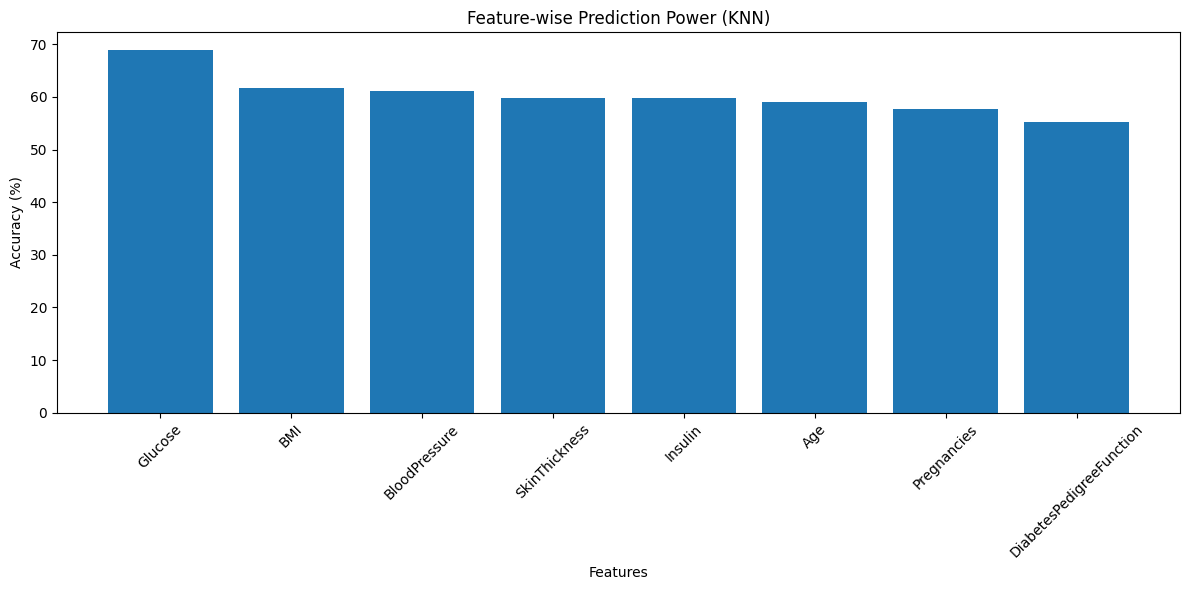


Feature importance relative to random prediction (50%):
Glucose: +37.66% better than random
BMI: +23.38% better than random
BloodPressure: +22.08% better than random
SkinThickness: +19.48% better than random
Insulin: +19.48% better than random
Age: +18.18% better than random
Pregnancies: +15.58% better than random
DiabetesPedigreeFunction: +10.39% better than random


In [106]:


# Load the data
data = pd.read_csv(r"E:\Ty sem 1\aiml corse sem 5 projects\Diabetes-Prediction-using-Machine-Learning-main\Diabetes-Prediction-using-Machine-Learning-main\Data\diabetes.csv")

# Features and target split
X = data.iloc[:, :-1].values  # Features
y = data.iloc[:, -1].values   # Target (Outcome)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN model
knn = KNearestNeighborsScratch(k=3)  # You can adjust k as needed

# Train the model
knn.fit(X_train, y_train)

# Make predictions on test data
knn_preds = knn.predict(X_test)

# Calculate accuracy
accuracy = np.mean(knn_preds == y_test) * 100

# Display predictions and accuracy
print("First 10 Predictions:", knn_preds[:10])
print("Actual values:", y_test[:10])
print(f"Overall Accuracy: {accuracy:.2f}%")

# Display confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, knn_preds))
print("\nClassification Report:")
print(classification_report(y_test, knn_preds))

# Feature-wise prediction analysis
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

print("\nFeature-wise prediction power:")
feature_accuracies = []

for i in range(len(feature_names)):
    # Extract single feature
    X_train_single = X_train[:, i:i+1]
    X_test_single = X_test[:, i:i+1]
    
    # Train and predict with single feature
    knn_single = KNearestNeighborsScratch(k=3)
    knn_single.fit(X_train_single, y_train)
    preds_single = knn_single.predict(X_test_single)
    
    # Calculate accuracy
    acc = np.mean(preds_single == y_test) * 100
    feature_accuracies.append((feature_names[i], acc))
    print(f"{feature_names[i]}: {acc:.2f}%")

# Sort features by their prediction power
print("\nFeatures sorted by prediction power:")
sorted_features = sorted(feature_accuracies, key=lambda x: x[1], reverse=True)
for feature, acc in sorted_features:
    print(f"{feature}: {acc:.2f}%")

# Optional: Visualize feature importance
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
features, accuracies = zip(*sorted_features)
plt.bar(features, accuracies)
plt.xticks(rotation=45)
plt.title('Feature-wise Prediction Power (KNN)')
plt.xlabel('Features')
plt.ylabel('Accuracy (%)')
plt.tight_layout()
plt.show()

# Optional: Calculate feature importance relative to random prediction
print("\nFeature importance relative to random prediction (50%):")
for feature, acc in sorted_features:
    relative_importance = (acc - 50) / 50 * 100  # How much better than random guessing
    print(f"{feature}: {relative_importance:+.2f}% better than random")

naive buyes

In [104]:
class NaiveBayesScratch:
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.classes = np.unique(y)
        self.mean = np.zeros((len(self.classes), n_features))
        self.var = np.zeros((len(self.classes), n_features))
        self.priors = np.zeros(len(self.classes))

        for idx, c in enumerate(self.classes):
            X_c = X[y == c]
            self.mean[idx, :] = X_c.mean(axis=0)
            self.var[idx, :] = X_c.var(axis=0)
            self.priors[idx] = X_c.shape[0] / n_samples

    def _pdf(self, class_idx, x):
        mean = self.mean[class_idx]
        var = self.var[class_idx]
        numerator = np.exp(-((x - mean)**2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

    def _predict(self, x):
        posteriors = []
        for idx, _ in enumerate(self.classes):
            prior = np.log(self.priors[idx])
            conditional = np.sum(np.log(self._pdf(idx, x)))
            posterior = prior + conditional
            posteriors.append(posterior)
        return self.classes[np.argmax(posteriors)]

    def predict(self, X):
        return [self._predict(x) for x in X]


First 10 Predictions: [0, 0, 0, 0, 1, 1, 0, 1, 0, 1]
Actual values: [0 0 0 0 0 0 0 0 0 0]
Overall Accuracy: 76.62%

Confusion Matrix:
[[79 20]
 [16 39]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



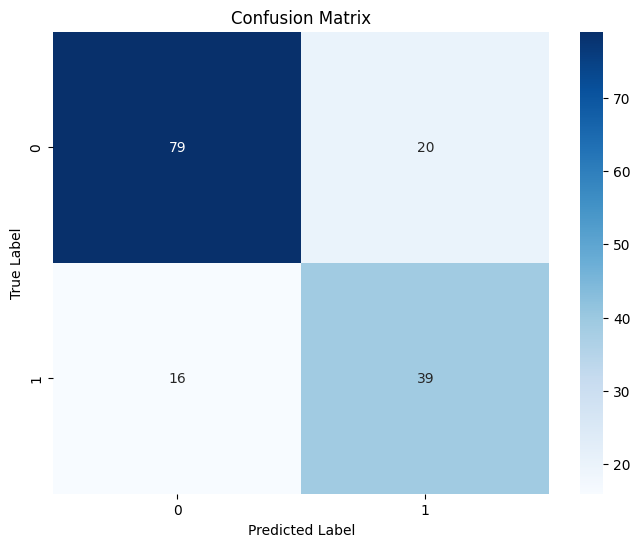


Feature-wise prediction power:
Pregnancies: 69.48%
Glucose: 75.97%
BloodPressure: 65.58%
SkinThickness: 63.64%
Insulin: 67.53%
BMI: 66.23%
DiabetesPedigreeFunction: 67.53%
Age: 57.14%

Features sorted by prediction power:
Glucose: 75.97%
Pregnancies: 69.48%
Insulin: 67.53%
DiabetesPedigreeFunction: 67.53%
BMI: 66.23%
BloodPressure: 65.58%
SkinThickness: 63.64%
Age: 57.14%


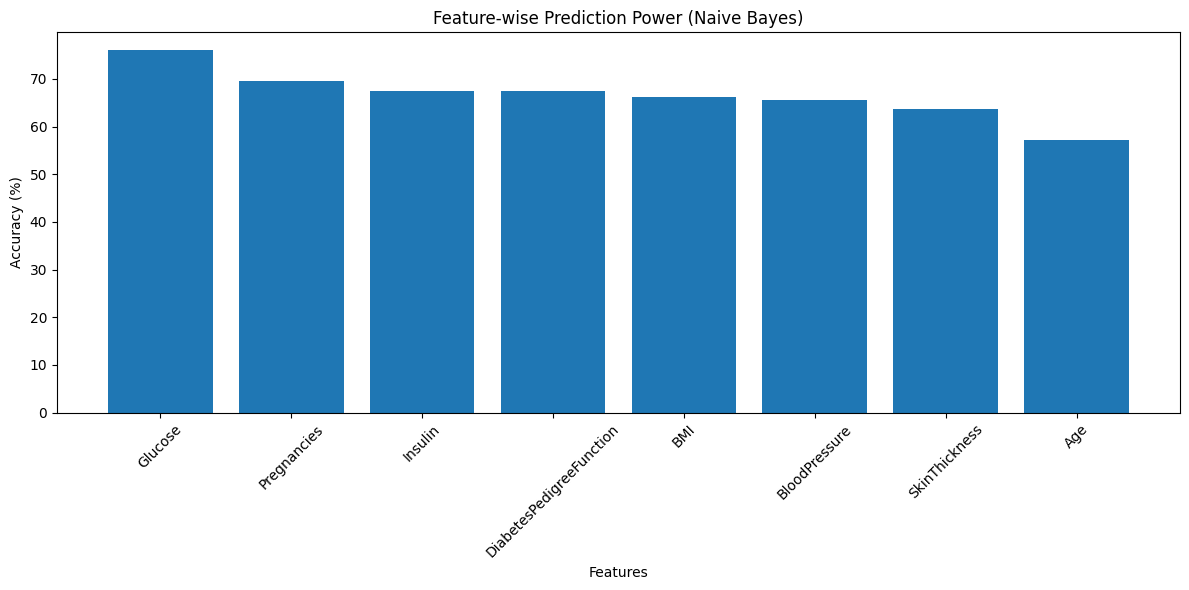


Feature importance relative to random prediction (50%):
Glucose: +51.95% better than random
Pregnancies: +38.96% better than random
Insulin: +35.06% better than random
DiabetesPedigreeFunction: +35.06% better than random
BMI: +32.47% better than random
BloodPressure: +31.17% better than random
SkinThickness: +27.27% better than random
Age: +14.29% better than random

Top feature combinations analysis:
Features ['Pregnancies', 'Glucose']: 77.92%
Features ['Pregnancies', 'BloodPressure']: 70.13%
Features ['Glucose', 'BloodPressure']: 75.97%
Features ['Pregnancies', 'Glucose', 'BloodPressure']: 78.57%

Cross-validation analysis:

Cross-validation scores: [73.98373983739837, 74.79674796747967, 69.91869918699187, 69.91869918699187, 79.50819672131148]
Average CV accuracy: 73.63%
CV Standard deviation: 3.57%

Analysis Recommendations:
1. Most important features: ['Glucose', 'Pregnancies', 'Insulin']
2. Features to consider dropping: ['SkinThickness', 'Age']
3. Best feature combination: ['Pre

In [110]:

from itertools import combinations

# Load the data
data = pd.read_csv(r"E:\Ty sem 1\aiml corse sem 5 projects\Diabetes-Prediction-using-Machine-Learning-main\Diabetes-Prediction-using-Machine-Learning-main\Data\diabetes.csv")

# Features and target split
X = data.iloc[:, :-1].values  # Features
y = data.iloc[:, -1].values   # Target (Outcome)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the main model
nb = NaiveBayesScratch()
nb.fit(X_train_scaled, y_train)

# Make predictions
nb_preds = nb.predict(X_test_scaled)

# Calculate overall accuracy
accuracy = np.mean(nb_preds == y_test) * 100

# Display basic results
print("First 10 Predictions:", nb_preds[:10])
print("Actual values:", y_test[:10])
print(f"Overall Accuracy: {accuracy:.2f}%")

# Display detailed metrics
conf_matrix = confusion_matrix(y_test, nb_preds)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, nb_preds))

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Feature-wise prediction analysis
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

print("\nFeature-wise prediction power:")
feature_accuracies = []

for i in range(len(feature_names)):
    X_train_single = X_train_scaled[:, i:i+1]
    X_test_single = X_test_scaled[:, i:i+1]
    
    nb_single = NaiveBayesScratch()
    nb_single.fit(X_train_single, y_train)
    preds = nb_single.predict(X_test_single)
    
    acc = np.mean(preds == y_test) * 100
    feature_accuracies.append((feature_names[i], acc))
    print(f"{feature_names[i]}: {acc:.2f}%")

# Sort and display features by prediction power
print("\nFeatures sorted by prediction power:")
sorted_features = sorted(feature_accuracies, key=lambda x: x[1], reverse=True)
for feature, acc in sorted_features:
    print(f"{feature}: {acc:.2f}%")

# Visualize feature importance
plt.figure(figsize=(12, 6))
features, accuracies = zip(*sorted_features)
plt.bar(features, accuracies)
plt.xticks(rotation=45)
plt.title('Feature-wise Prediction Power (Naive Bayes)')
plt.xlabel('Features')
plt.ylabel('Accuracy (%)')
plt.tight_layout()
plt.show()

# Calculate relative importance
print("\nFeature importance relative to random prediction (50%):")
for feature, acc in sorted_features:
    relative_importance = (acc - 50) / 50 * 100
    print(f"{feature}: {relative_importance:+.2f}% better than random")

# Feature combination analysis
print("\nTop feature combinations analysis:")
top_k = 3  # Analyze combinations of top k features
top_features = list(features[:top_k])
combination_results = []

for r in range(2, top_k + 1):
    for combo_idx in combinations(range(top_k), r):
        feature_names_selected = [feature_names[i] for i in combo_idx]
        X_train_selected = X_train_scaled[:, combo_idx]
        X_test_selected = X_test_scaled[:, combo_idx]
        
        nb = NaiveBayesScratch()
        nb.fit(X_train_selected, y_train)
        preds = nb.predict(X_test_selected)
        acc = np.mean(preds == y_test) * 100
        
        combination_results.append((feature_names_selected, acc))
        print(f"Features {feature_names_selected}: {acc:.2f}%")

# Cross-validation analysis
from sklearn.model_selection import KFold
print("\nCross-validation analysis:")
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = []

for train_idx, val_idx in kf.split(X_train_scaled):
    X_train_fold = X_train_scaled[train_idx]
    y_train_fold = y_train[train_idx]
    X_val_fold = X_train_scaled[val_idx]
    y_val_fold = y_train[val_idx]
    
    nb = NaiveBayesScratch()
    nb.fit(X_train_fold, y_train_fold)
    preds = nb.predict(X_val_fold)
    acc = np.mean(preds == y_val_fold) * 100
    cv_scores.append(acc)

print("\nCross-validation scores:", cv_scores)
print(f"Average CV accuracy: {np.mean(cv_scores):.2f}%")
print(f"CV Standard deviation: {np.std(cv_scores):.2f}%")

# Distribution analysis
#plt.figure(figsize=(15, 5))
#for i in range(len(feature_names)):
#    plt.subplot(2, 4, i+1)
#    sns.histplot(data=pd.DataFrame(X_train_scaled[:, i], columns=['value']), 
#                x='value', hue=y_train, bins=30, alpha=0.6)
#    plt.title(feature_names[i])
#    plt.xlabel('Standardized Value')
#plt.tight_layout()
#plt.show()

# Correlation analysis
#correlation_matrix = np.corrcoef(X_train_scaled.T)
#plt.figure(figsize=(10, 8))
#sns.heatmap(correlation_matrix, annot=True, fmt='.2f', 
#            xticklabels=feature_names, yticklabels=feature_names)
#plt.title('Feature Correlation Matrix')
#plt.show()

# Print recommendations based on analysis
print("\nAnalysis Recommendations:")
print("1. Most important features:", [f[0] for f in sorted_features[:3]])
print("2. Features to consider dropping:", [f[0] for f in sorted_features[-2:]])
print(f"3. Best feature combination:", max(combination_results, key=lambda x: x[1])[0])
print("4. Model stability:", "Stable" if np.std(cv_scores) < 5 else "Unstable")

# Optional: Save analysis results to a file
with open('naive_bayes_analysis.txt', 'w') as f:
    f.write(f"Overall Accuracy: {accuracy:.2f}%\n")
    f.write("\nFeature Importance:\n")
    for feature, acc in sorted_features:
        f.write(f"{feature}: {acc:.2f}%\n")
    f.write(f"\nCross-validation mean: {np.mean(cv_scores):.2f}%\n")
    f.write(f"Cross-validation std: {np.std(cv_scores):.2f}%\n")

# 5) Base Models

In [59]:
# Validation scores of all base models

models = []
models.append(('LR', LogisticRegression(random_state = 12345)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state = 12345)))
models.append(('RF', RandomForestClassifier(random_state = 12345)))
models.append(('SVM', SVC(gamma='auto', random_state = 12345)))
models.append(('XGB', GradientBoostingClassifier(random_state = 12345)))
models.append(("LightGBM", LGBMClassifier(random_state = 12345)))

# evaluate each model in turn
results = []
names = []

LR: 0.848684 (0.036866)
KNN: 0.840789 (0.023866)
CART: 0.857895 (0.024826)
RF: 0.881579 (0.026316)
SVM: 0.853947 (0.036488)
XGB: 0.890789 (0.020427)
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 236, number of negative: 448
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000152 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 704
[LightGBM] [Info] Number of data points in the train set: 684, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345029 -> initscore=-0.640961
[LightGBM] [Info] Start training from score -0.640961
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

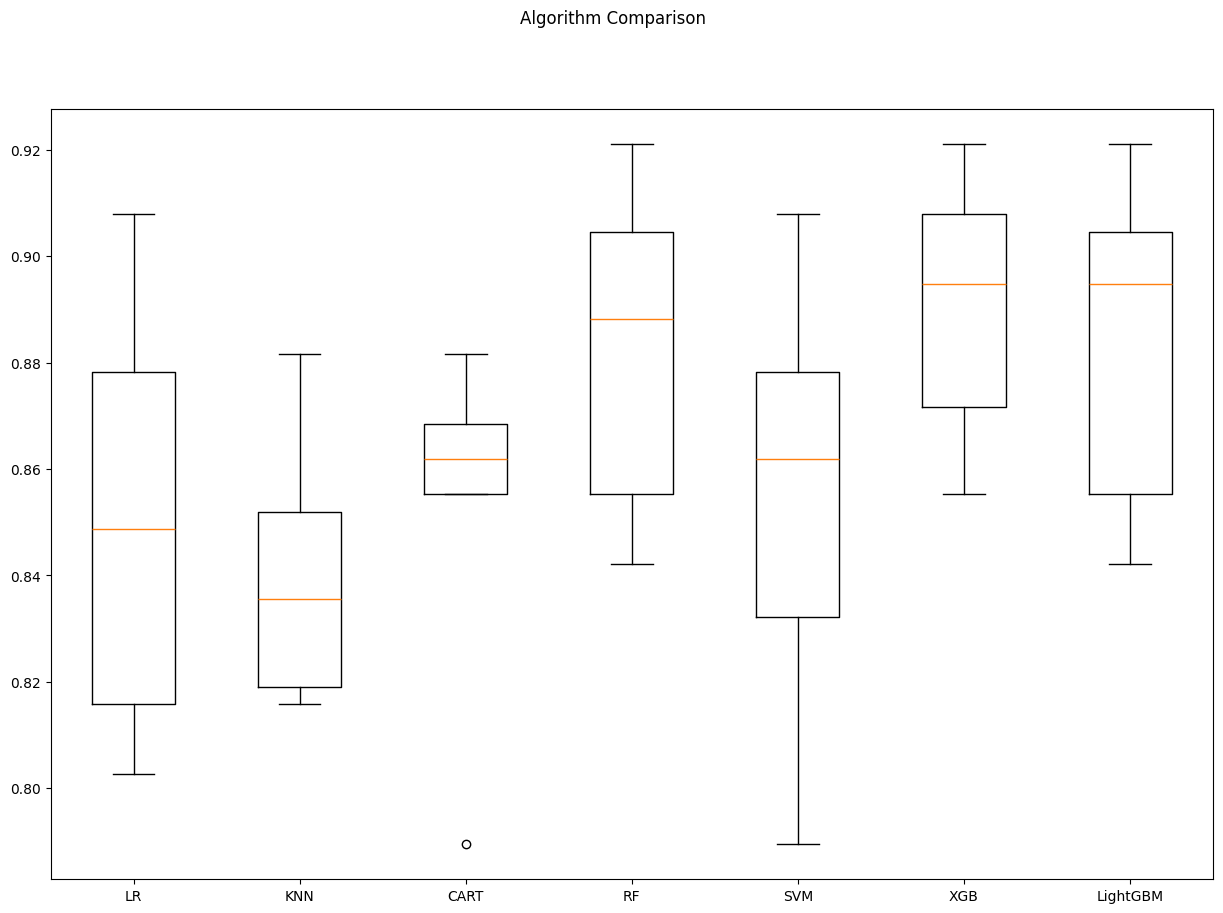

In [60]:
for name, model in models:
    
        kfold = KFold(n_splits = 10, shuffle=True, random_state = 12345)
        cv_results = cross_val_score(model, X, y, cv = 10, scoring= "accuracy")
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# 6) Model Tuning

### 1) Random Forests Tuning

In [ ]:
rf_params = {"n_estimators" :[100,200,500,1000], 
             "max_features": [3,5,7], 
             "min_samples_split": [2,5,10,30],
            "max_depth": [3,5,8,None]}

In [62]:
rf_model = RandomForestClassifier(random_state = 12345)

In [ ]:
gs_cv = GridSearchCV(rf_model, 
                    rf_params,
                    cv = 10,
                    n_jobs = -1,#use all processors
                    verbose = 2).fit(X, y)

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


In [64]:
gs_cv.best_params_

{'max_depth': 8,
 'max_features': 7,
 'min_samples_split': 2,
 'n_estimators': 500}

### 1.1) Final Model Installation

In [65]:
rf_tuned = RandomForestClassifier(**gs_cv.best_params_)

In [66]:
rf_tuned = rf_tuned.fit(X,y)

In [67]:
cross_val_score(rf_tuned, X, y, cv = 10).mean()

0.8947368421052632

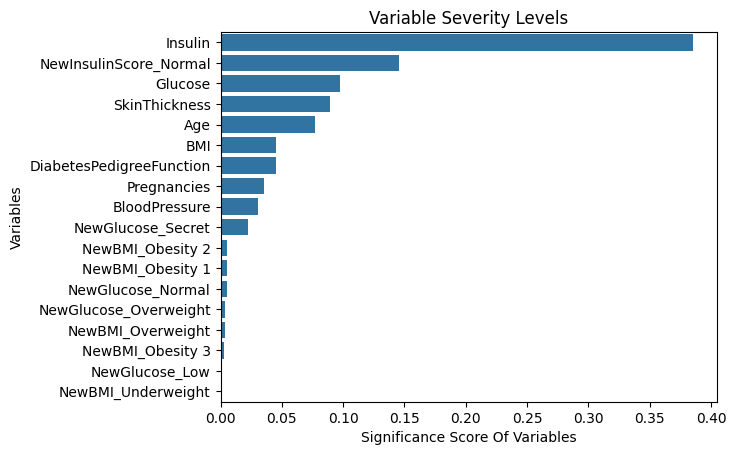

In [68]:
feature_imp = pd.Series(rf_tuned.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Severity Levels")
plt.show()

### 2) LightGBM Tuning

In [69]:
lgbm = LGBMClassifier(random_state = 12345)

In [70]:
lgbm_params = {"learning_rate": [0.01, 0.03, 0.05, 0.1, 0.5],
              "n_estimators": [500, 1000, 1500],
              "max_depth":[3,5,8]}


In [71]:
gs_cv = GridSearchCV(lgbm, 
                     lgbm_params, 
                     cv = 10, 
                     n_jobs = -1, 
                     verbose = 2).fit(X, y)

Fitting 10 folds for each of 45 candidates, totalling 450 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 263, number of negative: 497
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000142 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 751
[LightGBM] [Info] Number of data points in the train set: 760, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.346053 -> initscore=-0.636436
[LightGBM] [Info] Start training from score -0.636436
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

In [72]:
gs_cv.best_params_

{'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 500}

### 2.1) Final Model Installation

In [73]:
lgbm_tuned = LGBMClassifier(**gs_cv.best_params_).fit(X,y)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 263, number of negative: 497
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000171 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 751
[LightGBM] [Info] Number of data points in the train set: 760, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.346053 -> initscore=-0.636436
[LightGBM] [Info] Start training from score -0.636436
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [74]:
cross_val_score(lgbm_tuned, X, y, cv = 10).mean()

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 236, number of negative: 448
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000132 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 704
[LightGBM] [Info] Number of data points in the train set: 684, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345029 -> initscore=-0.640961
[LightGBM] [Info] Start training from score -0.640961
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

0.8973684210526315

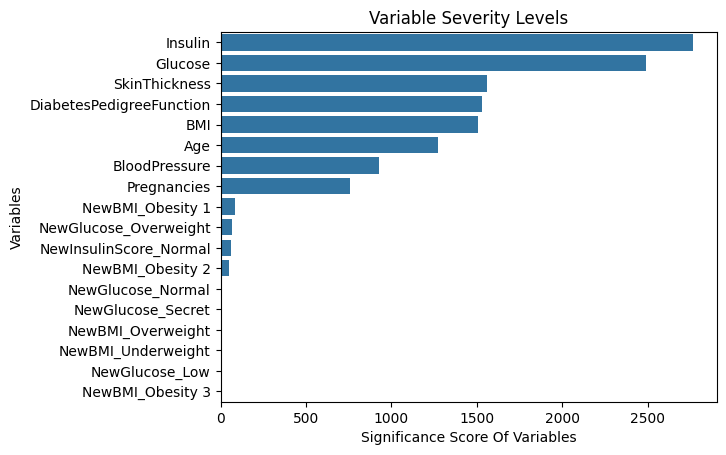

In [75]:
feature_imp = pd.Series(lgbm_tuned.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Severity Levels")
plt.show()

### 3) XGBoost Tuning

In [76]:
xgb = GradientBoostingClassifier(random_state = 12345)

In [77]:
xgb_params = {
    "learning_rate": [0.01, 0.1, 0.2, 1],
    "min_samples_split": np.linspace(0.1, 0.5, 10),
    "max_depth":[3,5,8],
    "subsample":[0.5, 0.9, 1.0],
    "n_estimators": [100,1000]}

In [78]:
xgb_cv_model  = GridSearchCV(xgb,xgb_params, cv = 10, n_jobs = -1, verbose = 2).fit(X, y)

Fitting 10 folds for each of 720 candidates, totalling 7200 fits


In [79]:
xgb_cv_model.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_samples_split': 0.1,
 'n_estimators': 100,
 'subsample': 1.0}

### 3.1) Final Model Installation

In [80]:
xgb_tuned = GradientBoostingClassifier(**xgb_cv_model.best_params_).fit(X,y)

In [81]:
cross_val_score(xgb_tuned, X, y, cv = 10).mean()

0.9013157894736843

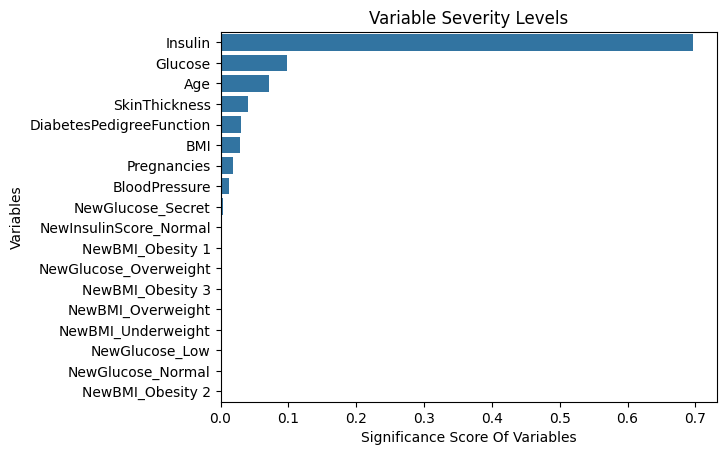

In [82]:
feature_imp = pd.Series(xgb_tuned.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Severity Levels")
plt.show()

# 7) Comparison of Final Models

In [83]:
models = []

models.append(('RF', RandomForestClassifier(random_state = 12345, max_depth = 8, max_features = 7, min_samples_split = 2, n_estimators = 500)))
models.append(('XGB', GradientBoostingClassifier(random_state = 12345, learning_rate = 0.1, max_depth = 5, min_samples_split = 0.1, n_estimators = 100, subsample = 1.0)))
models.append(("LightGBM", LGBMClassifier(random_state = 12345, learning_rate = 0.01,  max_depth = 3, n_estimators = 1000)))

# evaluate each model in turn
results = []
names = []

RF: 0.897368 (0.034211)
XGB: 0.901316 (0.028373)
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 236, number of negative: 448
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000230 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 704
[LightGBM] [Info] Number of data points in the train set: 684, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345029 -> initscore=-0.640961
[LightGBM] [Info] Start training from score -0.640961
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

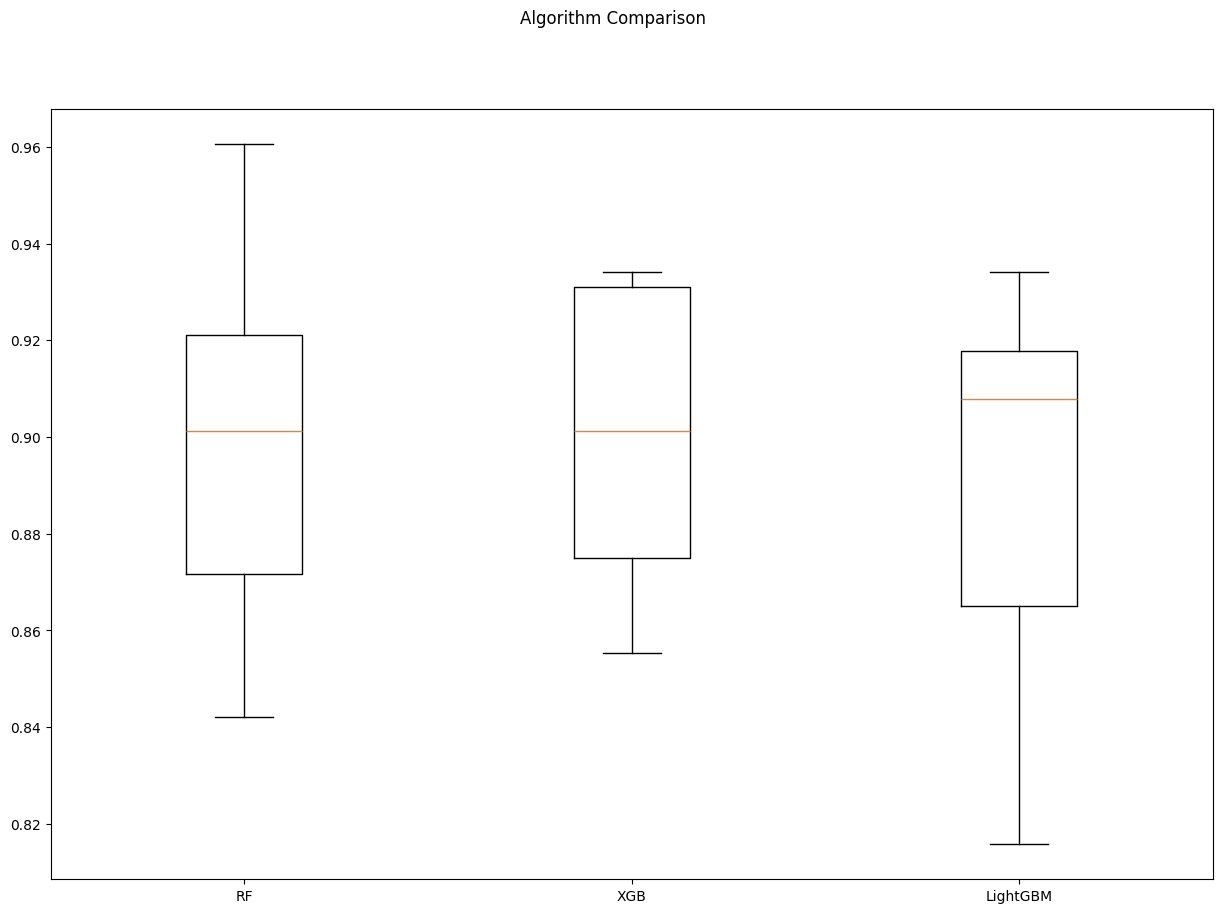

In [84]:
for name, model in models:
    
        kfold = KFold(n_splits = 10,shuffle=True ,random_state = 12345)
        cv_results = cross_val_score(model, X, y, cv = 10, scoring= "accuracy")
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# 8) Reporting

The aim of this study was to create classification models for the diabetes data set and to predict whether a person is sick by establishing models and to obtain maximum validation scores in the established models. The work done is as follows:

1) Diabetes Data Set read.

2) With Exploratory Data Analysis; The data set's structural data were checked.
The types of variables in the dataset were examined. Size information of the dataset was accessed. The 0 values in the data set are missing values. Primarily these 0 values were replaced with NaN values. Descriptive statistics of the data set were examined.

3) Data Preprocessing section;
df for: The NaN values missing observations were filled with the median values of whether each variable was sick or not. The outliers were determined by LOF and dropped. The X variables were standardized with the rubost method..

4) During Model Building;
Logistic Regression, KNN, SVM, CART, Random Forests, XGBoost, LightGBM like using machine learning models Cross Validation Score were calculated. Later Random Forests, XGBoost, LightGBM hyperparameter optimizations optimized to increase Cross Validation value.

5) Result;
The model created as a result of XGBoost hyperparameter optimization became the model with the lowest Cross Validation Score value. (0.90)